In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import to_categorical
from tcn import compiled_tcn

In [2]:
FashionMNIST_Train = pd.read_csv(r'C:\Fashion MNIST\Fashion MNIST\fashion-mnist\fashion-mnist_train.csv', engine='python')
FashionMNIST_Train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
FashionMNIST_Train.ndim

2

In [44]:
train_images = FashionMNIST_Train.iloc[0:, 1:]
train_labels = FashionMNIST_Train.iloc[0:, 0]

In [5]:
FashionMNIST_Test = pd.read_csv(r'C:\Fashion MNIST\Fashion MNIST\fashion-mnist\fashion-mnist_test.csv', engine='python')
FashionMNIST_Test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_images = FashionMNIST_Test.iloc[0:, 1:]
test_labels = FashionMNIST_Test.iloc[0:, 0]

In [7]:
print(f'train_images.shape = {train_images.shape}')
print(f'train_labels.shape = {train_labels.shape}')
print(f'test_images.shape = {test_images.shape}')
print(f'test_labels.shape = {test_labels.shape}')

train_images.shape = (60000, 784)
train_labels.shape = (60000,)
test_images.shape = (10000, 784)
test_labels.shape = (10000,)


In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [45]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

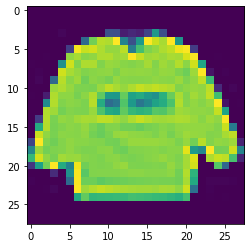

In [10]:
plt.imshow(train_images[0].reshape([28,28]))

In [112]:
#train_images = train_images.reshape([-1, 28, 28, 1])
#test_images = test_images.reshape([-1, 28, 28, 1])

In [46]:
train_images = tf.cast(train_images, tf.float32) / 255.0
test_images = tf.cast(test_images, tf.float32) / 255.0

Pullover


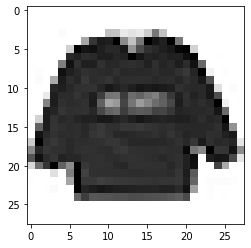

Ankle boot


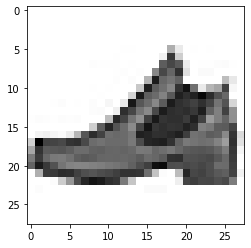

Shirt


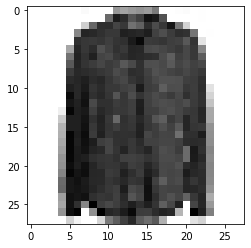

T-shirt/top


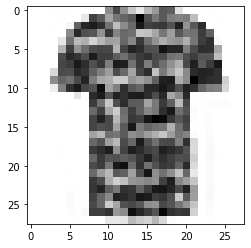

Dress


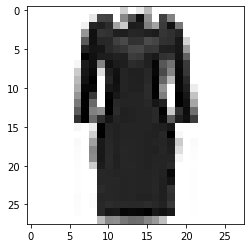

In [47]:
for x in range(5):
    print(class_names[train_labels[x]]) 
    plt.imshow(np.reshape(train_images[x],(28,28)),cmap=plt.cm.binary)
    plt.show()

In [14]:
train_data = train_images
test_data = test_images
model = compiled_tcn(return_sequences=False,
                         num_feat=1,
                         num_classes=10,
                         nb_filters=20,
                         kernel_size=6,
                         dilations=[2 ** i for i in range(9)],
                         nb_stacks=1,
                         max_len=train_data[0:1].shape[1],
                         use_skip_connections=True)

x.shape= (None, 20)
model.x = (None, 784, 1)
model.y = (None, 10)


In [15]:
print(model.input.shape, train_images[0:1].shape)

(None, 784, 1) (1, 784)


In [17]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784, 1)]          0         
_________________________________________________________________
tcn (TCN)                    (None, 20)                41320     
_________________________________________________________________
dense (Dense)                (None, 10)                210       
_________________________________________________________________
activation (Activation)      (None, 10)                0         
Total params: 41,530
Trainable params: 41,530
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(train_data, train_labels, epochs=1,validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 746s 398ms/step - loss: 0.6147 - accuracy: 0.7925 - val_loss: 0.3868 - val_accuracy: 0.8592
Epoch 2/10
1875/1875 [==============================] - 821s 438ms/step - loss: 0.4066 - accuracy: 0.8505 - val_loss: 0.3514 - val_accuracy: 0.8714
Epoch 3/10
1875/1875 [==============================] - 767s 409ms/step - loss: 0.3688 - accuracy: 0.8645 - val_loss: 0.3171 - val_accuracy: 0.8816
Epoch 4/10
1875/1875 [==============================] - 723s 386ms/step - loss: 0.3482 - accuracy: 0.8723 - val_loss: 0.3175 - val_accuracy: 0.8791
Epoch 5/10
1875/1875 [==============================] - 769s 410ms/step - loss: 0.3329 - accuracy: 0.8761 - val_loss: 0.3030 - val_accuracy: 0.8892
Epoch 6/10
1875/1875 [==============================] - 805s 430ms/step - loss: 0.3214 - accuracy: 0.8823 - val_loss: 0.2922 - val_accuracy: 0.8939
Epoch 7/10
1875/1875 [==============================] - 790s 422ms/step - loss: 0.3145 - accuracy: 0.8831 - val_

In [22]:
def predict(model,image):   
    accuracy = max(model.predict(tf.reshape(image,(1,784)))[0])*100
    pc = model.predict(tf.reshape(image,(1,784))).argmax(-1)[0]
    name = class_names[pc]

    print(pc,name," accuracy:", accuracy,"%")
    plt.imshow(tf.reshape(image,(28,28)),cmap=plt.cm.binary)
    plt.show()

0 T-shirt/top  accuracy: 87.68656253814697 %


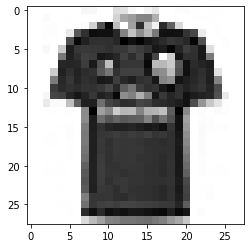

1 Trouser  accuracy: 100.0 %


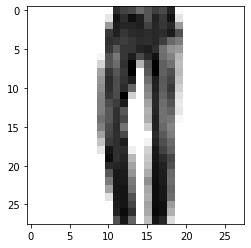

2 Pullover  accuracy: 97.8609561920166 %


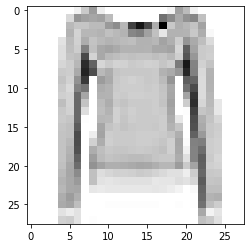

In [23]:
for x in test_images[:3]:
    predict(model,x)

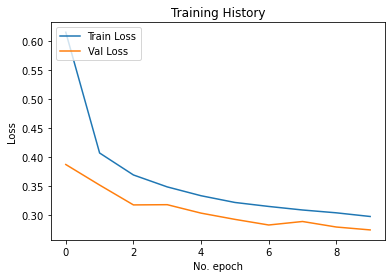

In [24]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training History')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

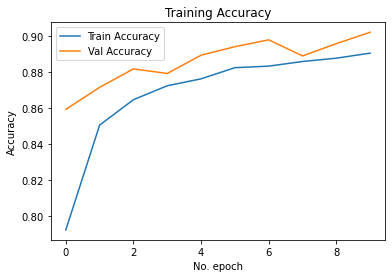

In [25]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [26]:
print("Model's training and validation accuracys are {0}% and {1}% respectively".format(history.history['accuracy'][-1]*100,history.history['val_accuracy'][-1]*100))

Model's training and validation accuracys are 89.0333354473114% and 90.18999934196472% respectively


### Put Noise on Dataset

Pullover


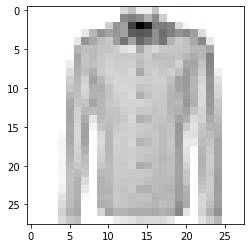

Ankle boot


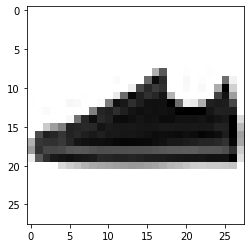

Shirt


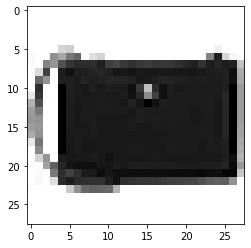

T-shirt/top


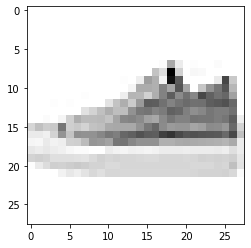

Dress


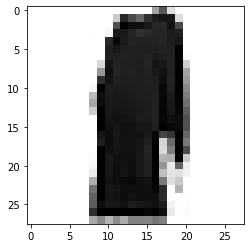

Pullover


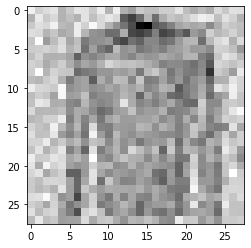

Ankle boot


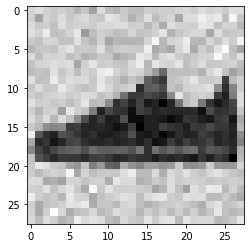

Shirt


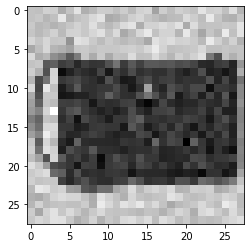

T-shirt/top


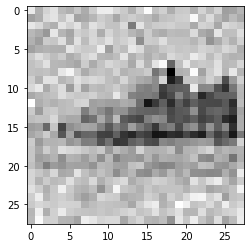

Dress


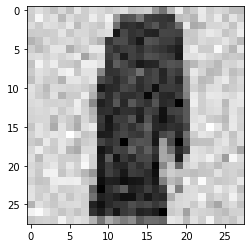

In [53]:
# Shuffle the dataset
train_images = tf.random.shuffle(train_images)

#Noise 
train_images_noise = train_images + 1 * np.random.normal(0,0.1,size = train_images.shape)

# Original Image
for x in range(5):
    print(class_names[train_labels[x]]) 
    plt.imshow(np.reshape(train_images[x],(28,28)),cmap=plt.cm.binary)
    plt.show()
    
# Noisy Image
for x in range(5):
    print(class_names[train_labels[x]]) 
    plt.imshow(np.reshape(train_images_noise[x],(28,28)),cmap=plt.cm.binary)
    plt.show()

In [55]:
train_data = train_images_noise
test_data = test_images
model = compiled_tcn(return_sequences=False,
                         num_feat=1,
                         num_classes=10,
                         nb_filters=20,
                         kernel_size=6,
                         dilations=[2 ** i for i in range(9)],
                         nb_stacks=1,
                         max_len=train_data[0:1].shape[1],
                         use_skip_connections=True)

x.shape= (None, 20)
model.x = (None, 784, 1)
model.y = (None, 10)


In [56]:
print(model.input.shape, train_images[0:1].shape)

(None, 784, 1) (1, 784)


In [57]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784, 1)]          0         
_________________________________________________________________
tcn (TCN)                    (None, 20)                41320     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 41,530
Trainable params: 41,530
Non-trainable params: 0
_________________________________________________________________


In [63]:
history = model.fit(train_data, train_labels, epochs=10,validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 1254s 669ms/step - loss: 2.3032 - accuracy: 0.1013 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 1100s 587ms/step - loss: 2.3032 - accuracy: 0.0982 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 738s 394ms/step - loss: 2.3031 - accuracy: 0.0999 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 767s 409ms/step - loss: 2.3030 - accuracy: 0.1005 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 716s 382ms/step - loss: 2.3028 - accuracy: 0.1030 - val_loss: 2.3034 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 718s 383ms/step - loss: 2.3026 - accuracy: 0.1038 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 701s 374ms/step - loss: 2.3022 - accuracy: 0.1020 - va

1 Trouser  accuracy: 10.236474871635437 %


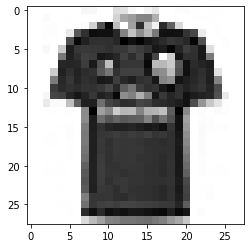

1 Trouser  accuracy: 10.236474871635437 %


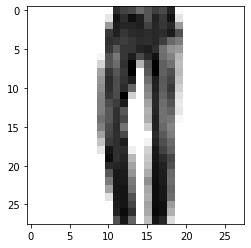

1 Trouser  accuracy: 10.236474871635437 %


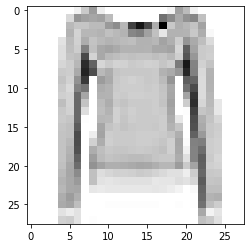

In [64]:
for x in test_images[:3]:
    predict(model,x)

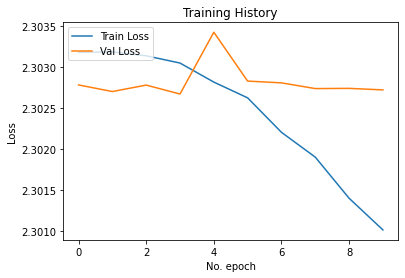

In [65]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training History')
plt.ylabel('Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

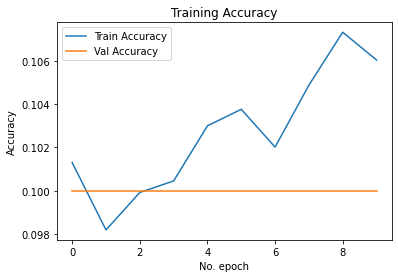

In [66]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [67]:
print("Model's training and validation accuracys are {0}% and {1}% respectively".format(history.history['accuracy'][-1]*100,history.history['val_accuracy'][-1]*100))

Model's training and validation accuracys are 10.604999959468842% and 10.000000149011612% respectively
